<a href="https://colab.research.google.com/github/marhooo/AKMMH/blob/main/%D0%90%D0%9A%D0%9C%D0%9C%D0%9D_%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%9F%D0%B5%D1%88%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D1%80%D0%B8%D1%82%D0%B0_%D0%91%D0%BE%D0%BD%D0%B4%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%AF%D0%BD%D0%B0_%D0%9F%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Аналіз кіберінцидентів методами машинного навчання
Практична робота №5

Тема: Метод K-найближчих сусідів в системах машинного навчання

Метод k-найближчих сусідів (k-NN) - це простий, але потужний алгоритм машинного навчання, який використовується для класифікації та регресії.

Його ідея базується на припущенні, що схожі об'єкти знаходяться поруч. Коли з'являється новий, некласифікований об'єкт, алгоритм k-NN:

1. Вимірює відстань (зазвичай Евклідову) від цього нового об'єкта до всіх об'єктів у навчальному наборі.

2. Знаходить 'k' найближчих до нього "сусідів" (де 'k' — це число, яке ми задаємо, наприклад, 5).

3. Проводить "голосування", тобто для задачі класифікації, новий об'єкт отримує той клас, який є найпоширенішим серед його 'k' сусідів.

Важливою особливістю k-NN є те, що він "лінивий" (lazy learner) — він не будує модель заздалегідь, а просто запам'ятовує всі навчальні дані і проводить обчислення лише під час прогнозу.

Імпорт бібліотек та завантаження даних

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Завантаження та попередній огляд даних




In [30]:
df = pd.read_csv('salaries_cyber.csv')

print("Перші 5 рядків DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nІнформація про DataFrame (info):")
df.info()

Перші 5 рядків DataFrame:
| work_year   | experience_level   | employment_type   | job_title              | salary   | salary_currency   | salary_in_usd   | employee_residence   | remote_ratio   | company_location   | company_size   |
|:------------|:-------------------|:------------------|:-----------------------|:---------|:------------------|:----------------|:---------------------|:---------------|:-------------------|:---------------|
| 2022        | EN                 | FT                | Cyber Program Manager  | 63000    | USD               | 63000           | US                   | 50             | US                 | S              |
| 2022        | MI                 | FT                | Security Analyst       | 95000    | USD               | 95000           | US                   | 0              | US                 | M              |
| 2022        | MI                 | FT                | Security Analyst       | 70000    | USD               | 70000           | US     

## Підготовка даних (Вибір ознак та масштабування)
Для методу k-NN критично важливо, щоб усі ознаки мали однаковий масштаб, оскільки алгоритм базується на вимірюванні відстані. Зарплата (напр., 100 000) та відсоток віддаленої роботи (напр., 50) мають абсолютно різний діапазон, тому зарплата буде "перетягувати" на себе всю вагу.

На цьому кроці:
1. Оберемо ознаки (X): salary_in_usd та remote_ratio.
2. Оберемо ціль (y): experience_level.
3. Масштабуємо ознаки (X) - застосуємо StandardScaler до X, щоб привести їх до єдиного масштабу (де середнє = 0, а стандартне відхилення = 1).

In [31]:
# 1. Визначимо ознаки (X) та цільову змінну (y)
features = ['salary_in_usd', 'remote_ratio']
target = 'experience_level'

X = df[features]
y = df[target]

# 2. Перевіримо унікальні значення в нашій цільовій змінній (y)
print(f"Унікальні класи в '{target}': {y.unique()}")

# 3. Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nПерші 5 рядків масштабованих даних (X_scaled):")
print(X_scaled[:5])

Унікальні класи в 'experience_level': ['EN' 'MI' 'EX' 'SE']

Перші 5 рядків масштабованих даних (X_scaled):
[[-0.81519508 -0.54642752]
 [-0.35976467 -1.81768707]
 [-0.71556968 -1.81768707]
 [-1.01653801 -0.54642752]
 [-0.00395967  0.72483203]]


Розділення даних на навчальний та тестовий набори


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Виведемо розміри отриманих наборів, щоб переконатися
print(f"Розмір навчального набору (X_train): {X_train.shape}")
print(f"Розмір тестового набору (X_test):   {X_test.shape}")
print(f"Розмір навчальних міток (y_train): {y_train.shape}")
print(f"Розмір тестових міток (y_test):   {y_test.shape}")

Розмір навчального набору (X_train): (997, 2)
Розмір тестового набору (X_test):   (250, 2)
Розмір навчальних міток (y_train): (997,)
Розмір тестових міток (y_test):   (250,)


## Створення та навчання моделі k-NN

Ініціалізуємо KNeighborsClassifier, і найважливіший параметр, який необхідно вказати, — це n_neighbors (кількість сусідів), тобто те саме 'k'.
Занадто мале 'k' (напр., 1) робить модель чутливою до "шуму".
Занадто велике 'k' робить модель "занадto узагальненою".

Для початку,  візьмемо k=5, це збалансоване стартове значення.

Після створення моделі навчимо її (методом .fit()) на  навчальних даних (X_train та y_train). Для k-NN "навчання" – це, по суті, просто процес запам'ятовування тренувального набору даних.

In [33]:
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

print(f"Модель k-NN (k={k}) успішно створена та навчена.")

Модель k-NN (k=5) успішно створена та навчена.


## Оцінка базової моделі (k=5)

Тепер перевіримо, наскільки добре працює  базова модель.

Зробимо прогнози на тестовому наборі (X_test) та порівняємо їх з реальними відповідями (y_test), щоб розрахувати точність (accuracy).


In [34]:
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Прогнози моделі (перші 20): {y_pred[:20]}")
print(f"Реальні значення (перші 20): {y_test.values[:20]}")
print("-" * 30)
print(f"Точність моделі (Accuracy) при k=5: {accuracy:.4f}")

Прогнози моделі (перші 20): ['SE' 'MI' 'SE' 'MI' 'SE' 'MI' 'MI' 'SE' 'MI' 'EX' 'MI' 'MI' 'SE' 'SE'
 'MI' 'SE' 'EN' 'SE' 'EN' 'EN']
Реальні значення (перші 20): ['MI' 'SE' 'MI' 'SE' 'SE' 'SE' 'MI' 'SE' 'MI' 'SE' 'SE' 'EN' 'MI' 'SE'
 'MI' 'SE' 'MI' 'SE' 'MI' 'SE']
------------------------------
Точність моделі (Accuracy) при k=5: 0.5440


## Пошук оптимального 'k'

Перевіримо точність моделі для k від 1 до 25 і знайдемо, при якому значенні k точність буде найвищою


Найкраща точність: 0.5840 (або 58.40%) досягнута при k = 19


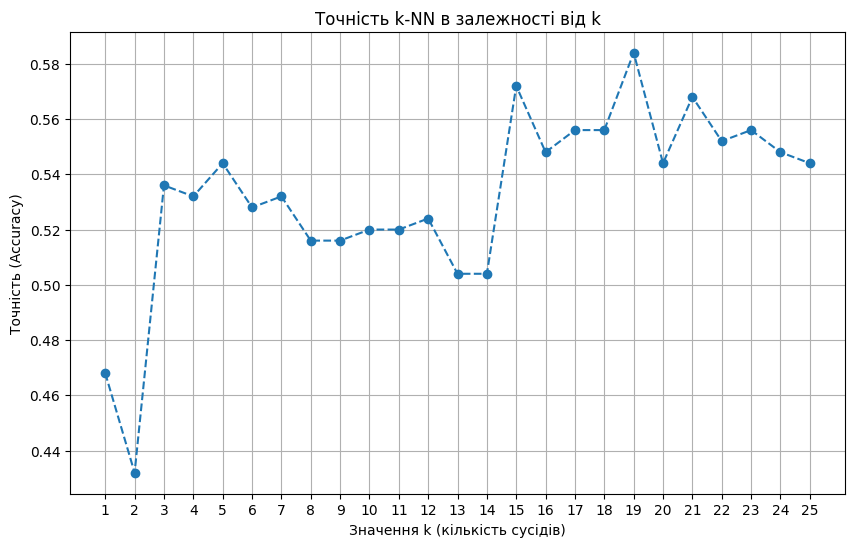

In [35]:
k_range = range(1, 26)
accuracies = []

for k in k_range:
    knn_model_loop = KNeighborsClassifier(n_neighbors=k)
    knn_model_loop.fit(X_train, y_train)

    y_pred_loop = knn_model_loop.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred_loop))

best_accuracy = max(accuracies)
best_k = k_range[accuracies.index(best_accuracy)]

print(f"Найкраща точність: {best_accuracy:.4f} (або {best_accuracy*100:.2f}%) досягнута при k = {best_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='dashed')
plt.title('Точність k-NN в залежності від k')
plt.xlabel('Значення k (кількість сусідів)')
plt.ylabel('Точність (Accuracy)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Візуалізація результатів
Матриця плутанини - це таблиця, яка показує, де саме найкраща модель (з k=19) помилялася. Вона порівнює "Реальний клас" з "Прогнозованим класом".

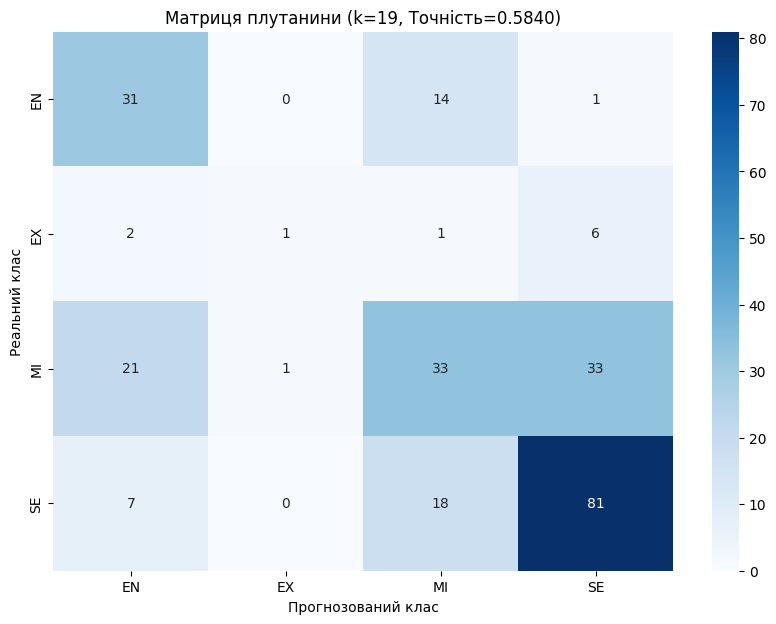

In [40]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
best_knn_model.fit(X_train, y_train)

y_pred_best = best_knn_model.predict(X_test)

class_labels = best_knn_model.classes_

cm = confusion_matrix(y_test, y_pred_best, labels=class_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Матриця плутанини (k={best_k}, Точність={best_accuracy:.4f})')
plt.xlabel('Прогнозований клас')
plt.ylabel('Реальний клас')
plt.show()

## Висновки

У ході виконання практичної роботи було успішно застосовано метод k-NN для класифікації рівня досвіду (experience_level) на основі зарплати та відсотка віддаленої роботи.

Було досліджено, що масштабування даних (StandardScaler) є критично важливим кроком для k-NN, оскільки алгоритм базується на відстані.

Експериментально було визначено, що найкраща точність (58.40%) досягається при k=19. (Початкова точність при k=5 була 54.40%).

Матриця плутанини показала, що головною проблемою моделі є плутанина між класами MI (Mid-level) та SE (Senior), що очікувано, оскільки лише зарплата не може чітко їх розділити.